In [13]:
from itertools import chain
class Dijkstra:

    def __init__(self, input):
        self.input = input
        self.path = []


    def calculate(self):
        return [self.calculateFromOrigin(i) for i, v in enumerate(self.input)]


    def calculateFromOrigin(self, origin):
        distance = [-1 for i in range(len(self.input))]
        path = [-1 for i in range(len(self.input))] # vector to get the best path

        # Distance from origin to itself is always 0
        distance.pop(origin)
        distance.insert(origin, 0)
        priority = list(range(len(self.input)))

        while True:
            if (len(priority) == 0): break
            frm = self.getSmallestPossibleVertex(distance, priority)
            priority.remove(frm)
            options = self.getOptionList(self.input[frm])
            for [position, weight] in options:
                dist = distance[frm] + weight
                if distance[position] == -1 or dist < distance[position]:
                    distance.pop(position)
                    distance.insert(position, dist)
                    path.pop(position)
                    path.insert(position, frm)

        self.path.insert(origin, path)
        return distance


    def getSmallestPossibleVertex(self, distances, priority):
        smallestKey = -1
        smallestValue = -1
        for i, item in enumerate(distances):
            if (smallestValue == -1 or (item >= 0 and item < smallestValue)) and i in priority:
                smallestValue = item
                smallestKey = i
        return smallestKey


    def getOptionList(self, vector):
        return [[i, weight] for i, weight in enumerate(vector) if weight > 0]
    
    
    def getPath(self):
        return self.path
    
    
    def getBestPath(self, frm, to):
        return [i for i in reversed(self._getBestPath(frm, to, [to]))]
        
        
    def _getBestPath(self, frm, to, path):
        path_ = self.path[frm]
        lastNode = path_[to]
        path.append(lastNode)
        if (lastNode == frm):
            return path
        else:
            return self._getBestPath(frm, lastNode, path)

In [14]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class GraphHelper:
    
    @staticmethod
    def printGraph(input, featured = 0):
        # Cria os nodes
        G = nx.DiGraph()
        for el1, vector in enumerate(input):
            for el2, w in enumerate(vector):
                if w > 0: G.add_edge(el1, el2, weight=w)
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        # Increase the size
        plt.figure(num=None, figsize=(4, 4), dpi=600)

        # Draw the basic
        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        # Set the color of the featured path
        if (featured):
            _featured = []
            for k, v in enumerate(featured):
                if (len(featured) >= k+2):
                    _featured.append((v, featured[k+1]))
            edge_colors = ['black' if not edge in _featured else 'red' for edge in G.edges()]
        else:
            edge_colors = 'black'
        
        nx.draw(G, pos, node_size = 700, node_color = G.nodes(), cmap=plt.cm.Blues, edge_color=edge_colors)

        plt.show()

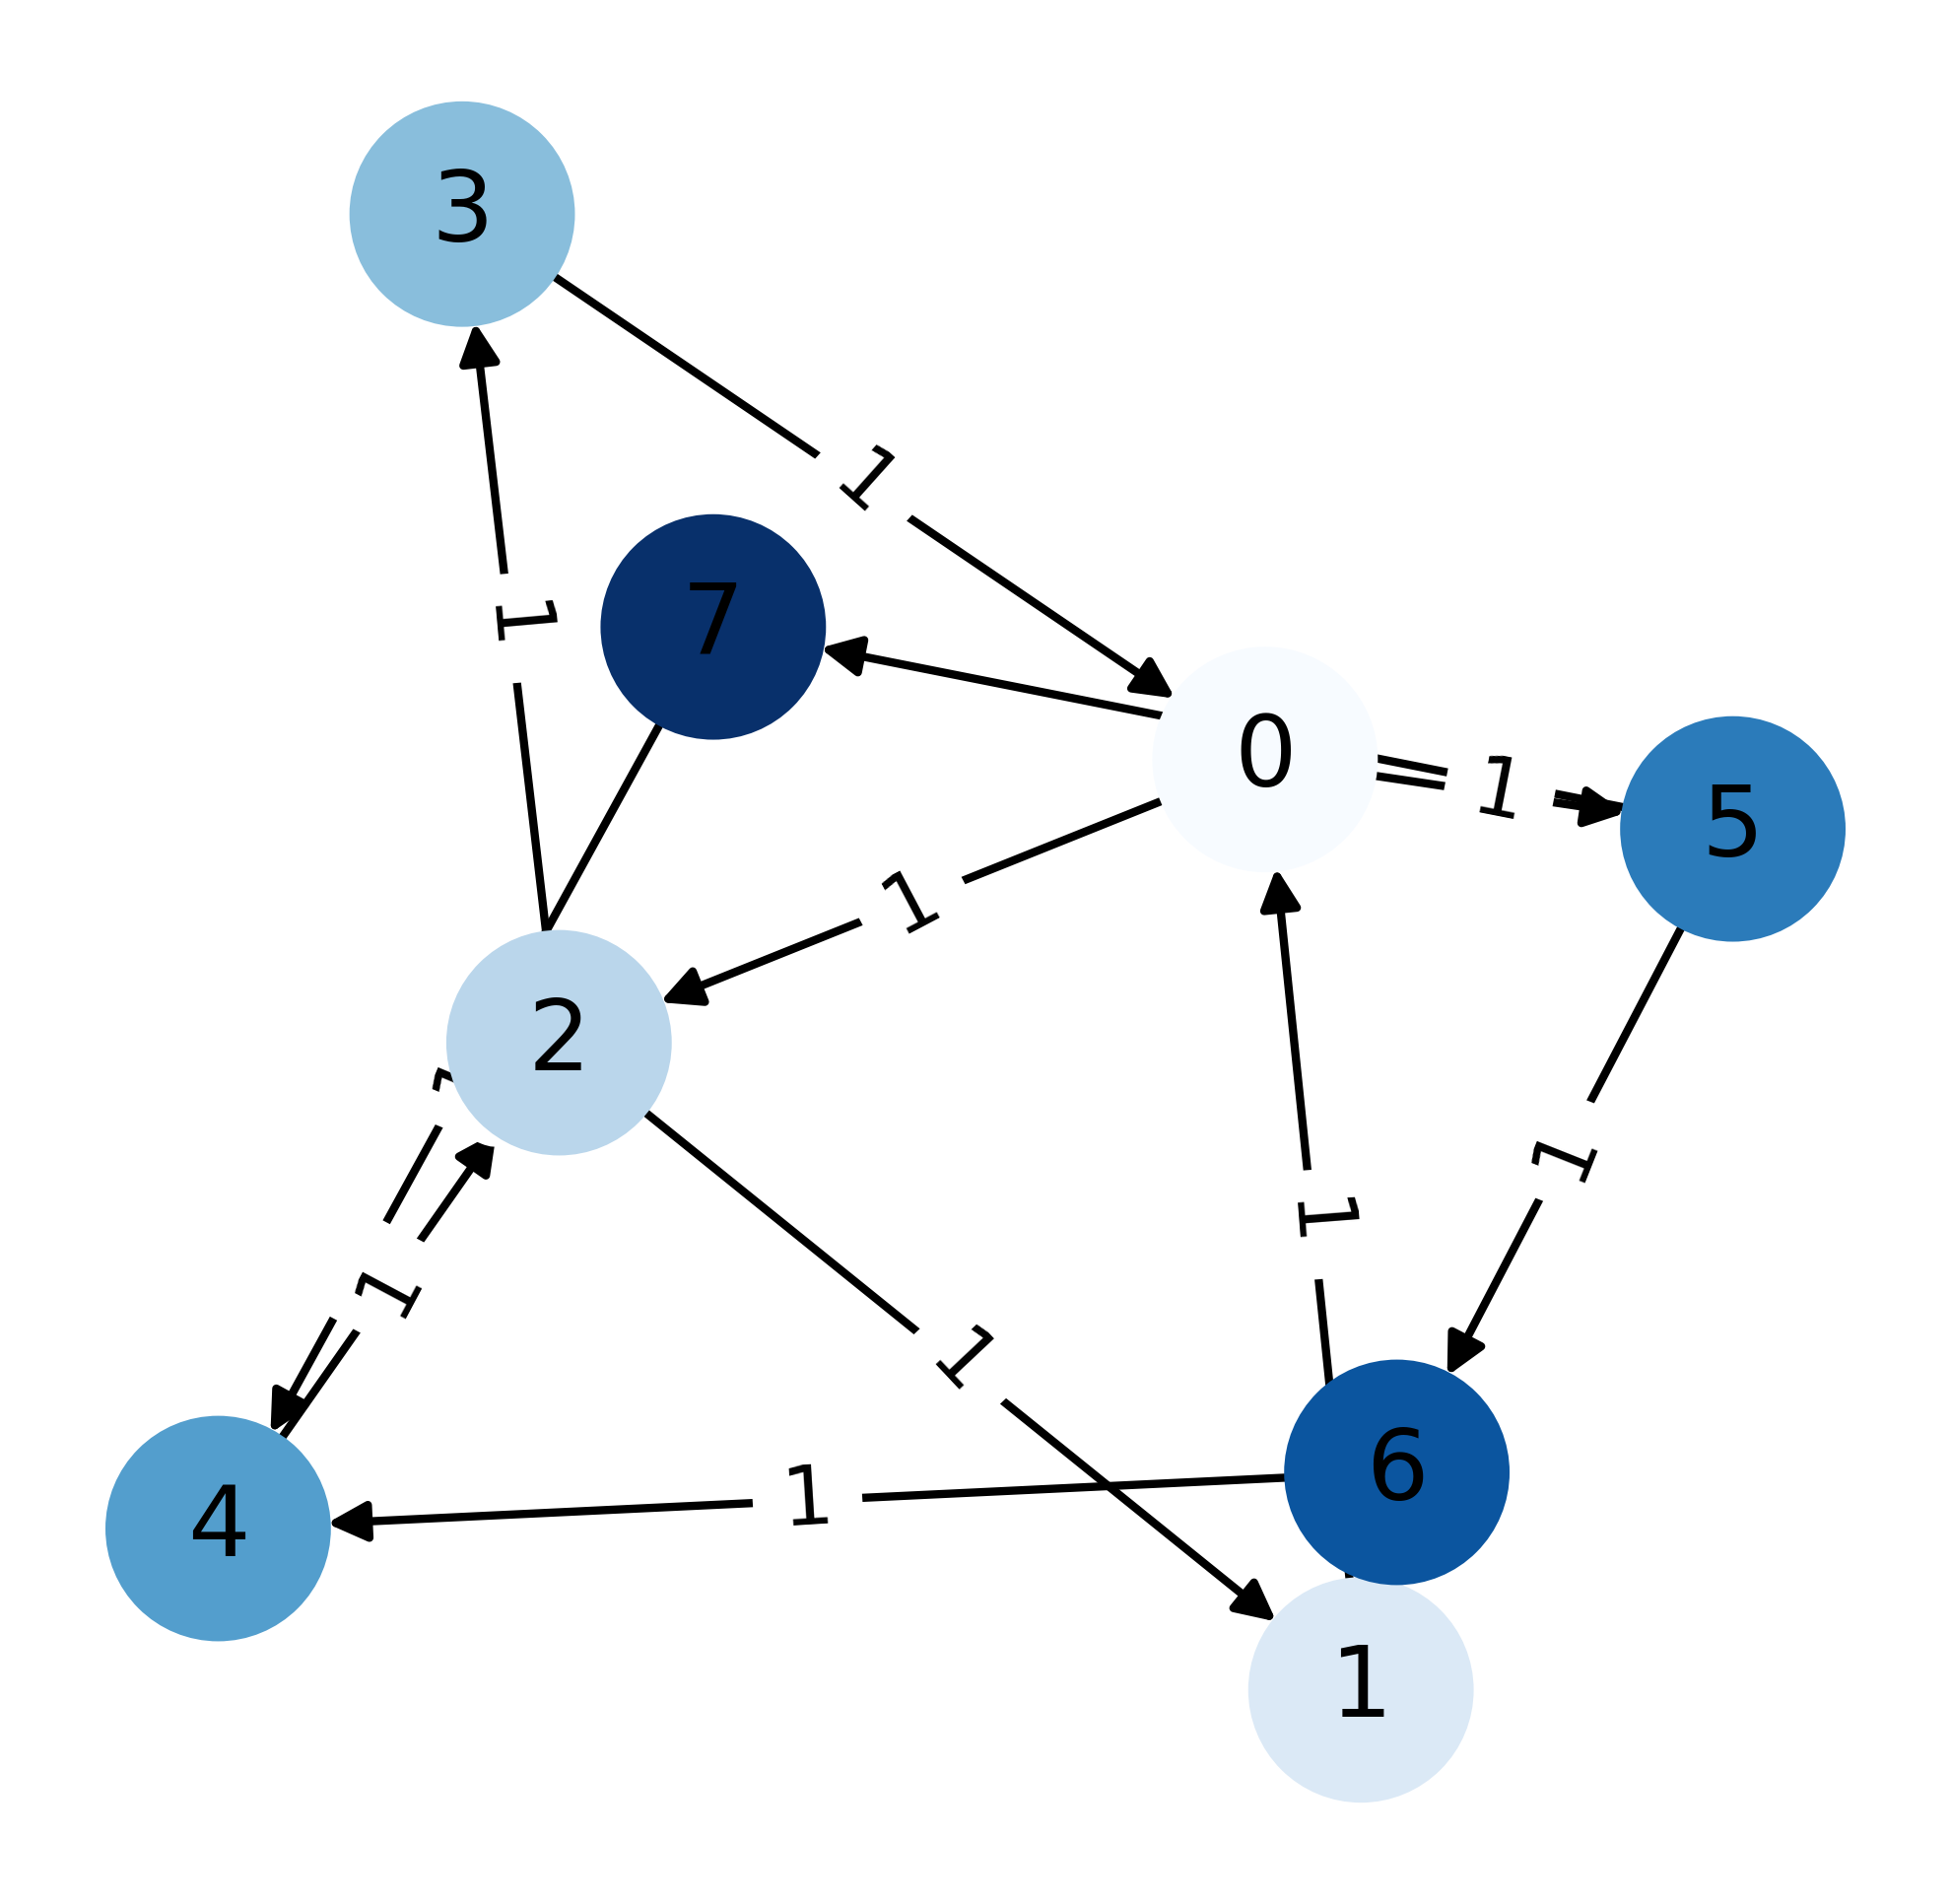

In [15]:
input = [[0,0,1,0,0,1,0,0],
        [1,0,0,0,0,0,0,0],
        [0,1,0,1,0,0,0,0],
        [1,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,1],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0]]

GraphHelper.printGraph(input)

In [16]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result): print ("from", k, v)

from 0 [0, 2, 1, 2, 3, 1, 2, 2]
from 1 [1, 0, 2, 3, 4, 2, 3, 3]
from 2 [2, 1, 0, 1, 5, 3, 4, 4]
from 3 [1, 3, 2, 0, 4, 2, 3, 3]
from 4 [3, 2, 1, 2, 0, 4, 5, 5]
from 5 [5, 4, 3, 4, 2, 0, 1, 1]
from 6 [4, 3, 2, 3, 1, 5, 0, 6]
from 7 [4, 3, 2, 3, 1, 5, 6, 0]


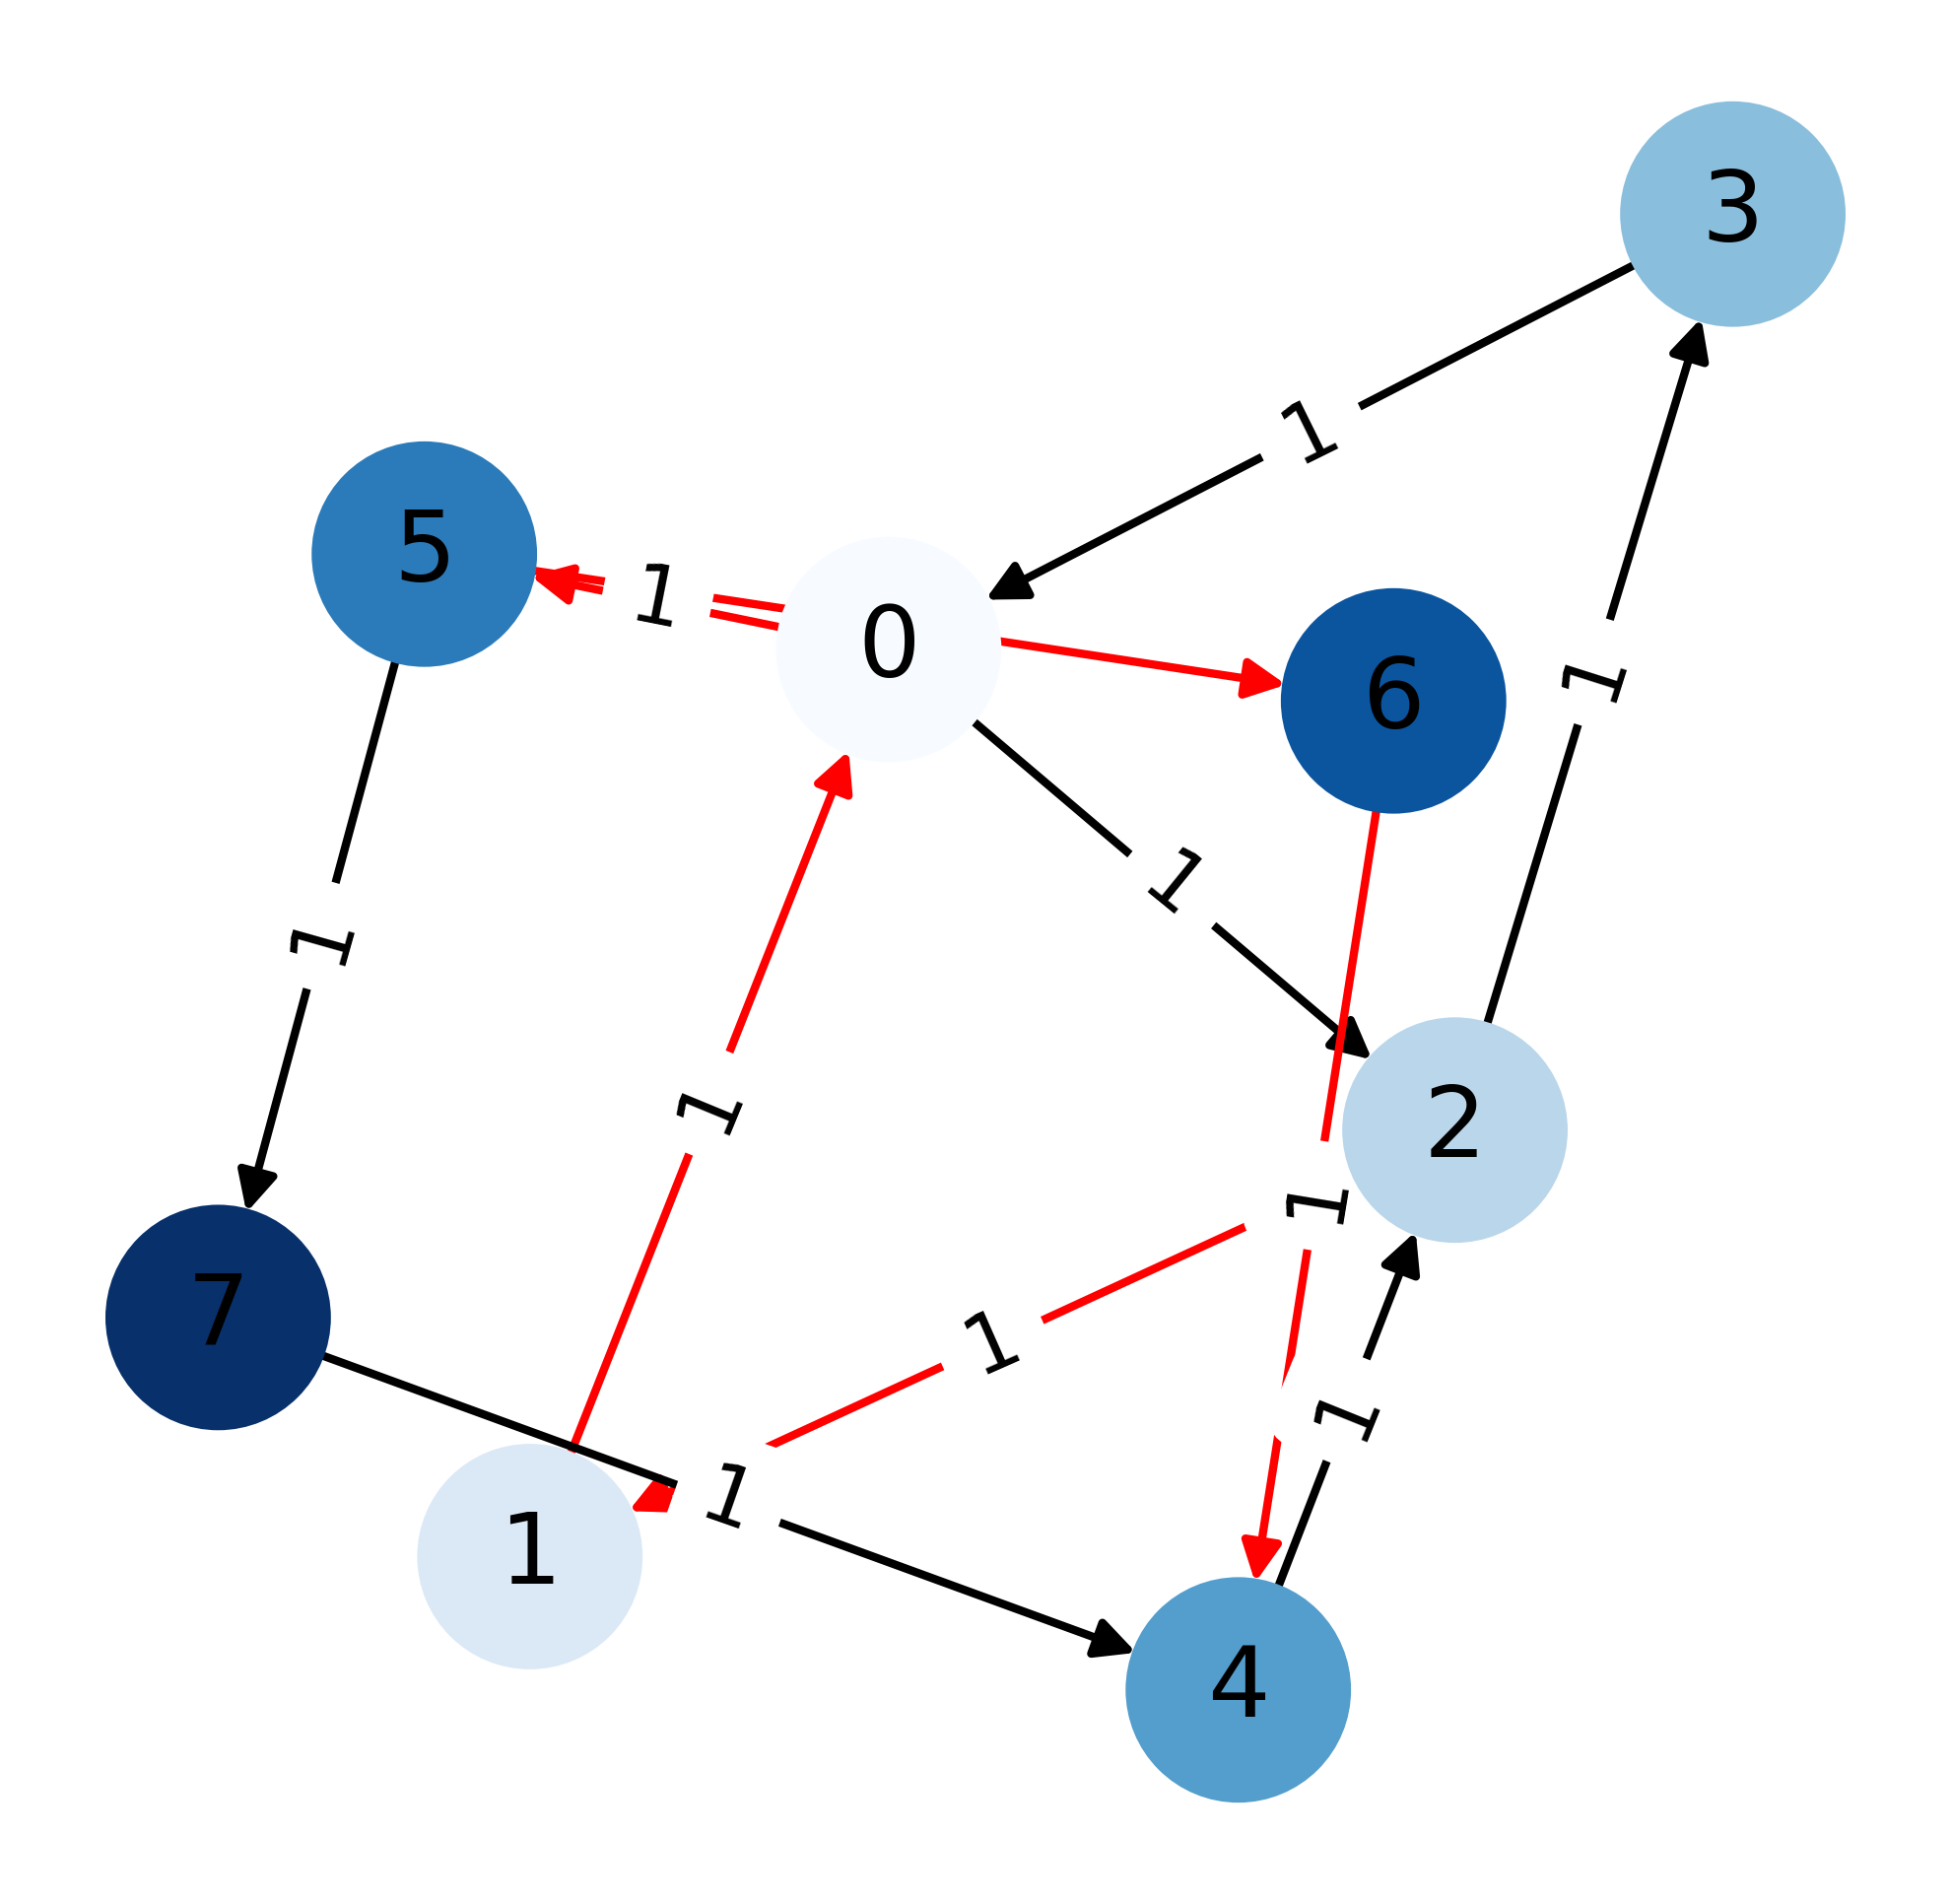

In [17]:
dj = Dijkstra(input)
result = dj.calculate()
GraphHelper.printGraph(input, dj.getBestPath(2, 4))